Once deleted, variables cannot be recovered. Proceed (y/[n])? y
B1 = 0.7447792361417753 gives R1 = 0.45602144637062414 gives D1 = -577.5155795423024
B2 = 0.014398539330243189 gives R2 = 0.014603691148940973 gives D2 = 0.41030363739556763


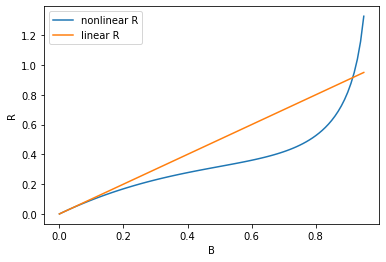

In [3]:
%reset
import numpy
import pylab

alpha = 7/8/0.9
k_DR = 0.0005
k_BR = 1 
D=0


# the nonlinear function (22):
def nonlinear_R(alpha,B):
    return -B**2. +1/2*numpy.log((alpha+B)/(alpha-B))

# the linear function (15) is the solution for dR/dt = 0
def linear_R(B,D):
    return k_BR*B + k_DR*D

b = numpy.arange(0.,0.96,0.01) # define a range for B. The maximum value of B cannot be bigger than alpha!
r_nonlinear = nonlinear_R(alpha,b)
r_linear = linear_R(b,D)

# The intersections of the curves below define the fixed points of the system
pylab.ion()
pylab.figure()
pylab.plot(b,r_nonlinear,label = 'nonlinear R')
pylab.plot(b,r_linear,label = 'linear R')
pylab.legend()
pylab.xlabel('B')
pylab.ylabel('R')

# we need to set the derivative of nonlinear_R to 1. The equation will be 2*B**3 + B**2 -2*B*(alpha**2) +  alpha - alpha**2 = 0. The roots are called solutions (for B) in the following:
solutions = numpy.roots([2., 1., -2*alpha**2, alpha-alpha**2])
positive_id = numpy.where(solutions >= 0.)[0] # the index of the solutions which are greater than zero
solutions_positive = solutions[positive_id] # positive solutions

B1 = solutions_positive[0]
B2 = solutions_positive[1]

R1 = nonlinear_R(alpha,B1) # finds the R value of the nonlinear equation for B1 which gives the derivative equal to 1.
D1 = (R1-B1)/k_DR # the value of D for the linear system to give that R1. This makes sure there is an intersection between the linear and the nonlinear equation

print('B1 = '+str(B1)+' gives R1 = '+str(R1)+' gives D1 = '+str(D1))

R2 = nonlinear_R(alpha,B2)
D2 = (R2-B2)/k_DR

print('B2 = '+str(B2)+' gives R2 = '+str(R2)+' gives D2 = '+str(D2))	# we accept the positive result for D.